# DBSCAN Density Clustering

Important concepts:
- x is a core point if there are at least minpts in its e-neighborhood, where e is the euclidian distance, and both minpts and e must be specified ahead of time.
- border point is defined as a point that does not meet the minpts threshold, but belongs to the neighborhood of some core point.
- if a point is neither a border or a core point (not in the neighborhood of a core point), then it is a noise point.
- two points x,y are density connected if there is a point z, and both x and y are density reachable from z.
- x is directly reachable from point y if x is e-distance away from y, and y is a core point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random # [0.0,1.0)
import math
from sklearn.utils import shuffle

In [2]:
# generating random data to visualize density clustering
noise_x = np.array([random() for i in range(60)])*10
noise_y = np.array([random() for i in range(60)])*10

block_1_x = np.concatenate([np.array([random() for i in range(30)])+1,np.array([random() for i in range(20)])+2,np.array([random() for i in range(20)])+2])
block_1_y = np.concatenate([np.array([random() for i in range(30)])*3+6,np.array([random() for i in range(20)])+8,np.array([random() for i in range(20)])+9])

block_2_x = np.concatenate([np.array([random() for i in range(50)])*2+1])
block_2_y = np.concatenate([np.array([random() for i in range(50)])*2+1])

block_3_x = np.concatenate([np.array([random() for i in range(50)])+5])
block_3_y = np.concatenate([np.array([random() for i in range(50)])*5+1])

block_4_x = np.concatenate([np.array([random() for i in range(70)])*5+5,np.array([random() for i in range(50)])+8])
block_4_y = np.concatenate([np.array([random() for i in range(70)])+8,np.array([random() for i in range(50)])*5+3])

x = np.concatenate([noise_x,block_1_x,block_2_x,block_3_x,block_4_x]) # concatenate the blocks 
y = np.concatenate([noise_y,block_1_y,block_2_y,block_3_y,block_4_y])

In [3]:
x,y = shuffle(x,y)

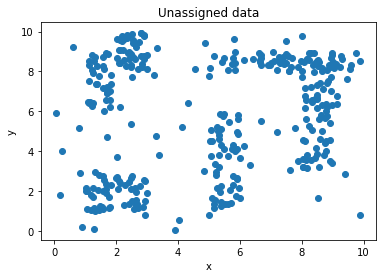

In [4]:
plt.scatter(x,y)
plt.title("Unassigned data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
data_points = [(x[i],y[i]) for i in range(x.shape[0])] # points represented as tuples
x.shape,y.shape,len(data_points)

((350,), (350,), 350)

In [6]:
def euclidian_distance(point1,point2):
    """ returns euclidian distance between two points
    """
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

In [7]:
def dbscan(data_points,e=0.7,min_points=5):
    """ returns the set of input points along with their group assignments
    args:
        e: max euclidian distance defining similarly grouped points
        min_points: minimum number of close points for assigning core points
    """
    core = set()
    all_points = {} # holds the group assignments, and list of similar points
    for i in range(len(data_points)):
        test_point = data_points[i]
        all_points[test_point] = {"k":0,"neighbors":[]} # k:0 represents noise points
        for j in range(len(data_points)):
            point = data_points[j]
            if i != j and euclidian_distance(test_point,point) <= e: # compute the distance
                all_points[test_point]["neighbors"].append(point)
        if len(all_points[test_point]["neighbors"]) >= min_points: # found a core point
            core.add(test_point)
            
    k = 0 # for assigning the groups
    stack = []
    while len(core) > 0:
        k += 1
        stack.append(core.pop())
        while len(stack) > 0:
            a_core = stack.pop()
            for point in all_points[a_core]["neighbors"]:
                if point in core: # the neighbor is also a core point
                    core.remove(point)
                    stack.append(point)
                all_points[point]["k"] = k
    
    return [all_points[key]["k"] for key in all_points.keys()]

In [8]:
labels = dbscan(data_points)

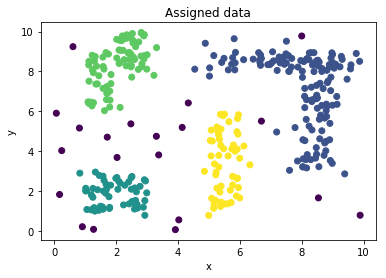

In [9]:
plt.scatter(x,y,c=labels) # ultra dark points are noise
plt.title("Assigned data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()